## Python Cookbook: simple recipies for plotting, fitting and animation

In [2]:
#Load the basics
import numpy as np    
import scipy as sci
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Choose a style and check out other cool styles via print(plt.style.available)
plt.style.use('ggplot')  

# Increase resolution for retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


# Load interactive widgets
import ipywidgets as widgets

## A gallery of useful examples

### Plotting in 1D

1D plotting is conveniently done by creating fig and ax objects which allow saving figure and cutomizing plot properties respectively

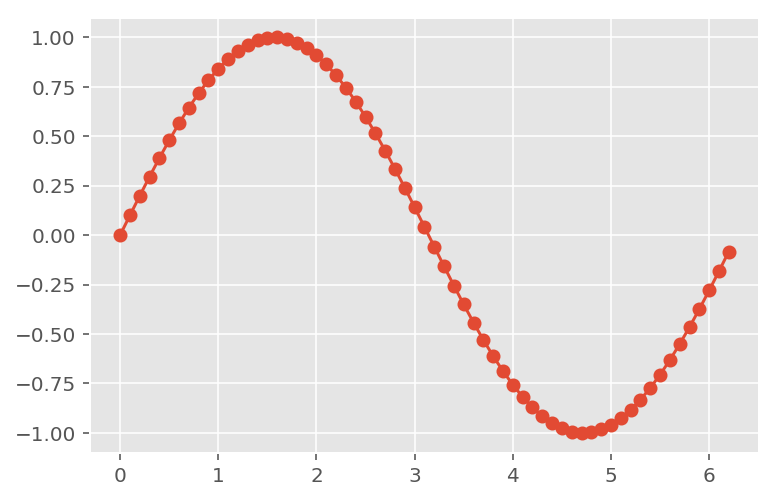

In [3]:
fig, ax = plt.subplots()          # Create fig and ax objects

t = np.arange(0.0,  2*np.pi, 0.1) # create x values via np.arange or np.linspace

s = np.sin(t)                     # create y values

ax.plot(t, s, '-o')                     # make the plot

#fig.savefig('myFIG.png')         # save figure

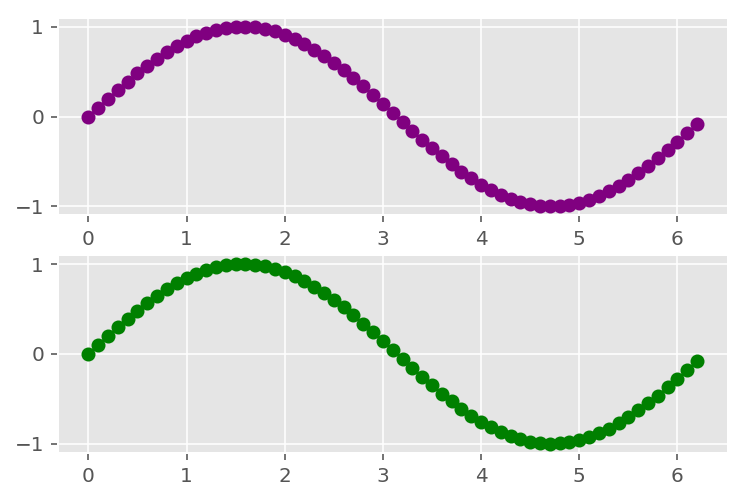

In [4]:
fig, ax = plt.subplots(2,1)          # Create fig and ax objects

t = np.arange(0.0,  2*np.pi, 0.1) # create x values

s = np.sin(t)                     # create y values

ax[0].plot(t, s,'-o', color='purple', lw=1.0)  # plot on subplot-1
ax[1].plot(t, s,'-o', color='green',  lw=1.0)  # plot  on subplot-2

#fig.savefig('sd.png')             # save the figure

### Plotting in 2D

To make 2D plots we need to generate 2D grid $(x,y)$ of points and pass it to our function $f(x,y)$

$$f(x,y) = sin(x) \cdot cos(x) \,\,\,$$

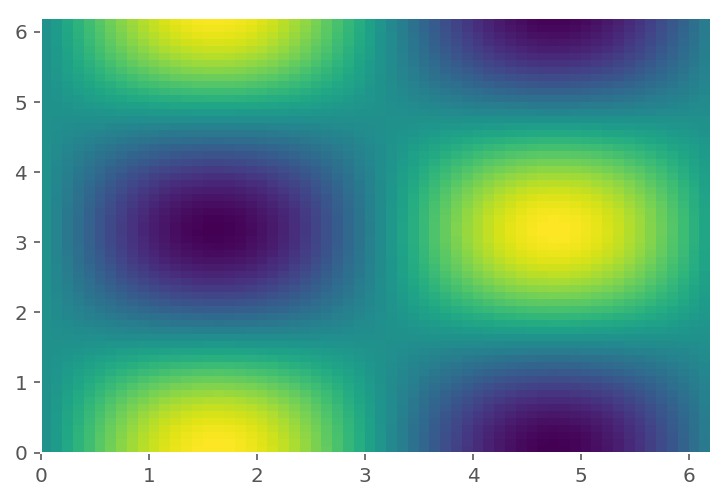

In [4]:
fig, ax = plt.subplots()              # Create fig and ax objects

x = np.arange(0.0,  2*np.pi, 0.1)    # create x values

y = np.arange(0.0,  2*np.pi, 0.1)    # create y values

X, Y = np.meshgrid(x,y)           # tunring 1D array into 2D grids of x and y values

Z = np.sin(X) * np.cos(Y)           # feed 2D grids to our 2D function f(x,y)

ax.pcolor(X, Y, Z)         # plot 

# try also ax.contour, ax.contourf

### Plot 3D

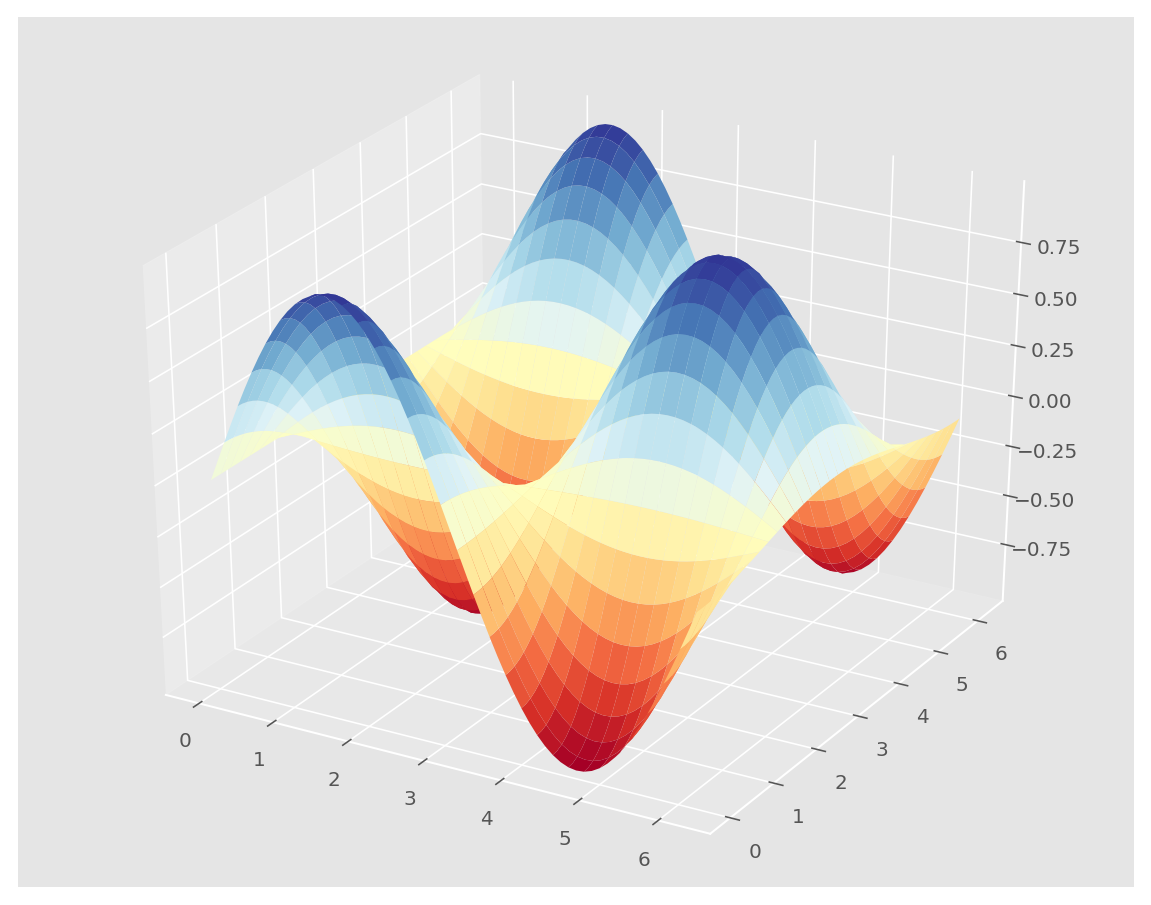

In [20]:
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

# Create 3D canvas
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Using X,Y,Z grid of points in previous step 
ax.plot_surface(X, Y, Z, cmap='RdYlBu')

### Fitting functions

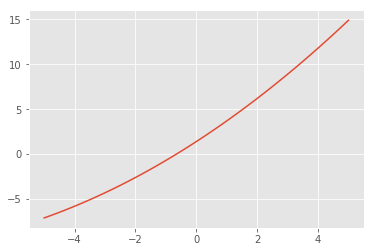

In [102]:
#Lets come up with a polynomial function with three constant coefificients
coef = np.array([0.1, 2.2, 1.4])

x = np.linspace(-5, 5, 100)

y0 = coef[0]*x**2 + coef[1]*x + coef[2]

plt.plot(x, y0)

### Using interactive widgets to explore parameters of functions

Suppose we would like to explore how variation of parameter $\lambda $ affects the following funciton of a satanding wave: 

$$f(x) = sin \Big(\frac{2\pi x}{\lambda}\Big)$$

**Step 1** Make a python-function which creates a plot as a function of parameter(s) of interest. 

**Step 2** Add an interactive widget on top to vary the parameter.

In [21]:
@widgets.interact(L=(1,12))    # Vary between 0.2 and 20

def wave(L=1):          # We make default value equal to 1
    
    x=np.linspace(-10,10,1000)
        
    f = np.sin(2*np.pi*x/L)
        
    plt.plot(x,f, lw=2, color='blue')

interactive(children=(IntSlider(value=1, description='L', max=12, min=1), Output()), _dom_classes=('widget-int…

### Simple animations

While widgets are useful sometimes we want to make movies of our numerical explorations. We can do taht by using animate methods from matploltib library. To show animation we also need to change %matplotlib magic to notebook format as done in the cell below.

In [22]:
import matplotlib.animation as animation

#We change the matplotlib format from inline to notebook
#Make sure to go back to %matplotlib inline afterwords for making non-animated plots
%matplotlib notebook  
%matplotlib notebook  

Here we make a simple animation of a traveling wave. Animation is made by re-drawing the plot for different values of t with a pre-defined consant interval.

In [25]:
def travel_wave(x,t):       
    '''A function to be animated over time t'''    
    
    return np.cos(x-t)*np.sin(x/10-t/10)  #+np.cos(x+t)*np.sin(x/10+t/10) # Try making traveling wave into standing

def animate(t):  
    '''Animation function'''
    
    line.set_ydata(travel_wave(x,t))  # update the plot as t variables evolves
    
    return line,

<IPython.core.display.Javascript object>


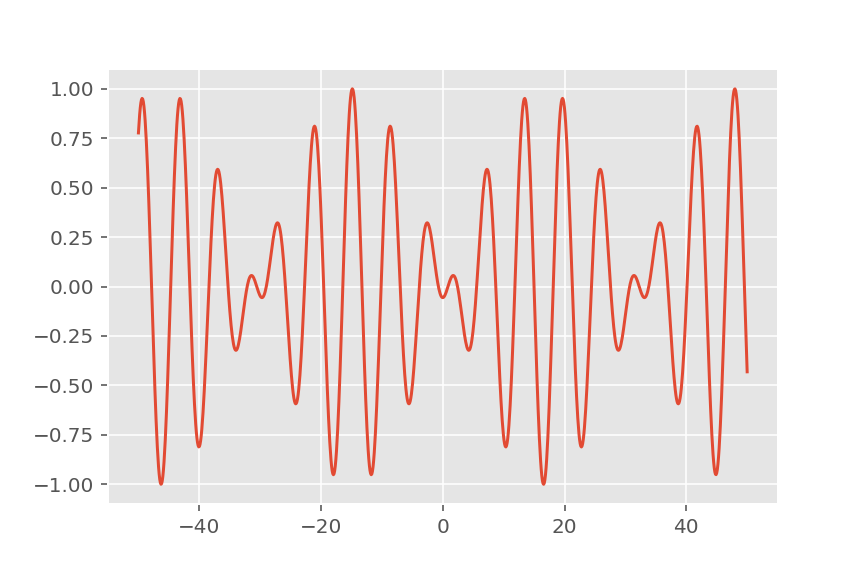

In [26]:
fig, ax = plt.subplots()

x     = np.linspace(-50,50,1000)  # We will keep x-values fixed

line, = ax.plot(x, travel_wave(x,0))  #the plot will be updated by varying the t-values

ani = animation.FuncAnimation(fig, animate, interval=40, blit=True, save_count=200)

# Save animation
#ani.save("Mymovie.mp4")